In [1]:
from ROOT import TCanvas, TPad, TFile, TPaveText, TChain, TCut, TF1, TH1F, TH2F, TCutG, TText, TLatex, TLine
from ROOT import gBenchmark, gStyle, gROOT

In [2]:
import rootnotes
from numpy import *
import scipy
import pylab
import matplotlib.pyplot as plt # plotting libraries from matlab
from scipy.stats import multivariate_normal

In [3]:
%pylab inline  
#always do this for plotting...  don't ask why
#now set the size of figures to display in window
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # set size of figures

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [4]:
import sys
sys.path.insert(2, '//global/project/projectdirs/lux/data')
import aLib

In [5]:
g1=0.1167
g2=12.05

g1DD=g1*0.982
g2DD=g2*0.954

<h1> 2D Normal fitting  </h1>

In [6]:
import scipy.optimize as opt
import numpy as np

def twoD_Gaussian((x, y), amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
    return g.ravel()

In [7]:
#c1 = rootnotes.default_canvas(size=(400,300)) # use TCanvas
#c1.SetGridx()
#c1.SetGridy()

<h1> Load in all the LUX Run03 WIMP Search Data </h1>

In [8]:
chain5 = TChain('golden')
chain5.Add('/project/projectdirs/lux/data/golden/Golden_CH3T_*.root')

chain4 = TChain('golden')
chain4.Add('/project/projectdirs/lux/data/golden/Golden_DD_*.root')

chain3 = TChain('golden')
chain3.Add('/project/projectdirs/lux/data/golden/Golden_Cs137_Aug.root')

chain2 = TChain('golden')
chain2.Add('/project/projectdirs/lux/data/golden/Golden_XeAct/*.root')

chain = TChain('golden')
chain.Add('/project/projectdirs/lux/users/acurrie/Run3_DP2.0/*.root')

9

<h1> Define the S1 and S2 cuts to seperate the islands of energy (see later plots) </h1>

In [9]:
Energies=[8.5, 31]
NamesE=["8.5 keV Cu X-ray, 31 keV X-ray"]
cutsE=array([[6, 12],
           [25,35]])


mean_s2=zeros(len(Energies))
mean_s2_sig=zeros(len(Energies))
mean_s1=zeros(len(Energies))
mean_s1_sig=zeros(len(Energies))

<h1> 9 keV lines in the Cs data </h1>

<h3> First plot the WS data, with 3 sigma ER band as per the tiritum calibration </h3>

In [24]:
c1 = rootnotes.default_canvas(name='icanvas1', size=(800, 600))

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: density_plt_hst (Potential memory leak).


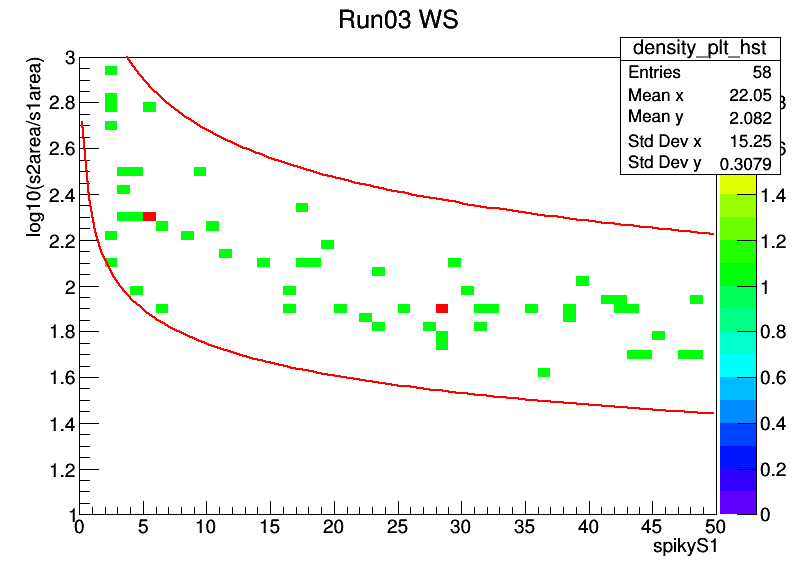

In [25]:
#95% ER bounds from tritium

au = 3.5  #use 3.10 for 2 sigma bounds #90% 3.007
bu = -0.1158 
    
al = 2.3; # use 2.592 #90% 2.682
bl =-0.1197;

er_cut_l=TCut('log10(s2area/spikyS1)>{:g}*spikyS1^{:g}'.format(al,bl))
er_cut_u=TCut('log10(s2area/spikyS1)<{:g}*spikyS1^{:g}'.format(au,bu))


fid_vol=TCut('drift>0 && drift<325 && correctedRadius<25')
area_cut=TCut('spikyS1>0 && s1area<50 && spikyS1<50 && s2area_raw>150 && s2area>100 && s2area<10**5')
bad_area_cut=TCut('((goodArea<=630 && badArea < 80) || (goodArea>630 && badArea < 80+0.095*(goodArea-630)))')
combined_cut=TCut(fid_vol.GetTitle() + '&&'+ area_cut.GetTitle() + '&&' + bad_area_cut.GetTitle() + '&&' + er_cut_l.GetTitle() + '&&' + er_cut_u.GetTitle() );

density_plt_hst=TH2F('density_plt_hst','Run03 WS;spikyS1;log10(s2area/s1area)',50,0,50,50,1,3)

#chain2.SetMarkerStyle(6)
#chain2.SetMarkerSize(10)
n=chain3.Draw('log10(s2area/spikyS1):spikyS1>>density_plt_hst',combined_cut,'colz') # WS is chain, chain2 is XeAct, chain3 is Cs137, 4 is DD

fun1 = TF1( 'fun1', '{:g}*x^{:g}'.format(al,bl), 0, 50)
fun2 = TF1( 'fun1', '{:g}*x^{:g}'.format(au,bu), 0, 50)
fun1.Draw('Same')
fun2.Draw('Same')

c1

<h1> Now histogram the ER events at low energy (around 3 sigma as defined by tritium) </h1>

In [27]:
c2.Clear()

In [28]:
c2 = rootnotes.default_canvas(name='icanvas2', size=(800, 600))

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: density_plt_hst (Potential memory leak).


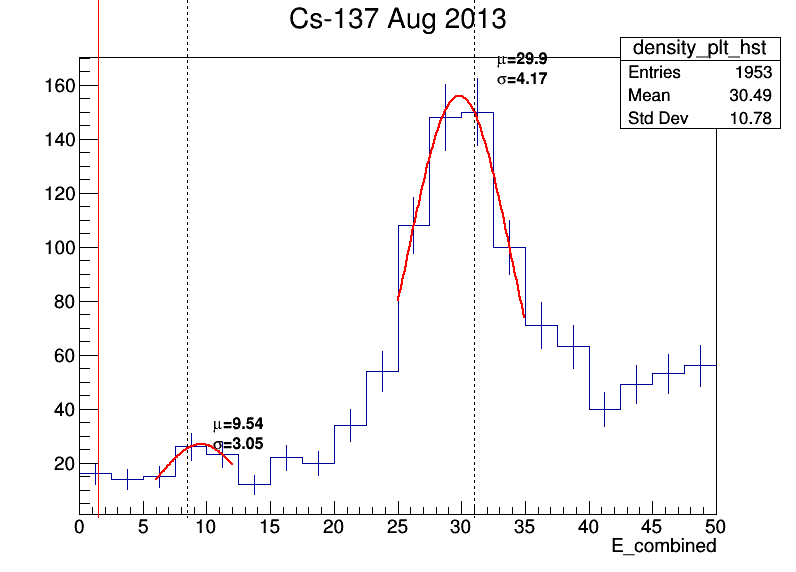

In [29]:
auCs = 3.5  #use 3.10 for 2 sigma bounds #90% 3.007
buCs = -0.1158 
    
alCs = 2.3; # use 2.592 #90% 2.682
blCs =-0.1197;

er_cut_l=TCut('log10(s2area/s1area)>{:g}*s1area^{:g}'.format(alCs,blCs))
er_cut_u=TCut('log10(s2area/s1area)<{:g}*s1area^{:g}'.format(auCs,buCs))

fid_vol=TCut('drift>0 && drift<325 && correctedRadius<25')
area_cut=TCut('s1area>0  && s1area<500 && s2area_raw>150 && s2area>200 && s2area<10**6') #spikyS1
bad_area_cut=TCut('((goodArea<=630 && badArea < 80) || (goodArea>630 && badArea < 80+0.095*(goodArea-630)))')
ercut= er_cut_l.GetTitle() + '&&' + er_cut_u.GetTitle()
#energy_cut=TCut('1/73*(spikyS1/{:g}+s2area/{:g})'.format(g1,g2)+'<4 &&1/73*(spikyS1/{:g}+s2area/{:g})'.format(g1,g2)+'>1.5' )
combined_cut=TCut(fid_vol.GetTitle() + '&&'+ area_cut.GetTitle() + '&&' + bad_area_cut.GetTitle() + '&&' + ercut ) ;

density_plt_hst=TH1F('density_plt_hst','Cs-137 Aug 2013;E_combined',20,0,50)
n=chain3.Draw('1/73*(s1area/{:g}+s2area/{:g})>>density_plt_hst'.format(g1,g2),combined_cut) # WS is chain2 #  Cs is chain3
density_plt_hst.SetOption("EH")

aline=[]
Energies=[8.5,31] 

for ii, En in enumerate(Energies):
    aline.append(TLine(En,0,En,360))
    aline[ii].SetLineStyle(2)
    aline[ii].SetLineColor(1) #black =1
    aline[ii].Draw()

Thresh=TLine(1.5,0,1.5,360)#energy threshold
Thresh.SetLineColor(2)
Thresh.Draw()

amps=[]
means=[]
sigmas=[]
Texts=[]

density_plt_hst.Fit("gaus","","",cutsE[0,0],cutsE[0,1]);
amps.append(density_plt_hst.GetFunction("gaus").GetParameter(0) )
means.append(density_plt_hst.GetFunction("gaus").GetParameter(1) )
sigmas.append(density_plt_hst.GetFunction("gaus").GetParameter(2) )

density_plt_hst.Fit("gaus","","",cutsE[1,0],cutsE[1,1]);
amps.append(density_plt_hst.GetFunction("gaus").GetParameter(0) )
means.append(density_plt_hst.GetFunction("gaus").GetParameter(1) )
sigmas.append(density_plt_hst.GetFunction("gaus").GetParameter(2) )

amps=array(amps)
means=array(means)
sigmas=array(sigmas)

for ii, mu in enumerate(means):
    Texts.append(TLatex(mu*1.1,amps[ii]*1.05,'#splitline{{#mu={:1.3g}}}{{#sigma={:1.3g}}}'.format(means[ii],sigmas[ii]) ))
    Texts[ii].SetTextSize(0.03)
    Texts[ii].Draw()

    
density_plt_hst.Fit("gaus","","",cutsE[0,0],cutsE[0,1]);
density_plt_hst.Fit("gaus","+","",cutsE[1,0],cutsE[1,1]);

gStyle.SetOptFit(0) # superimpose fit results
c2

In [14]:
c3 = rootnotes.default_canvas(name='9keV')

In [101]:
chain3.Clear()

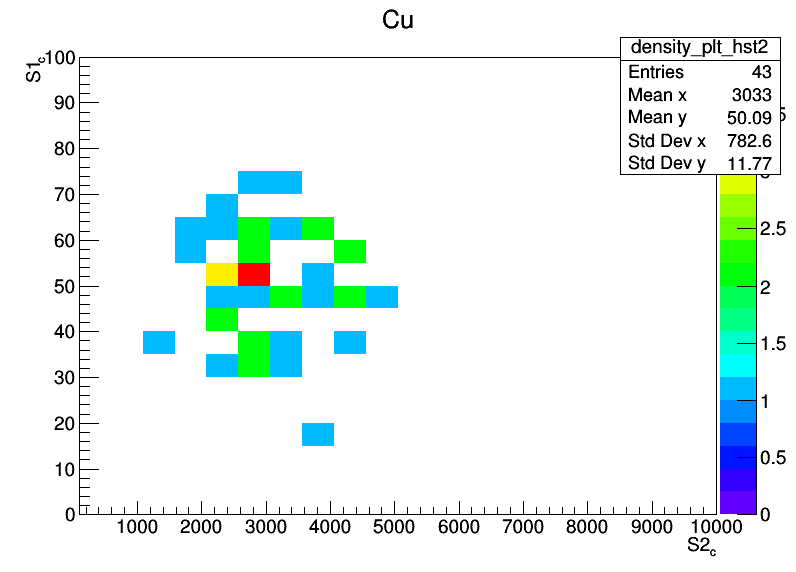

In [15]:
#chain.SetMarkerStyle(7)
#chain.SetMarkerSize(10)
#setup s2 vs s2 hist to get LY,QY
density_plt_hst2=TH2F('density_plt_hst2','Cu;S2_{c};S1_{c}',20,100,10000,20,0,100)
energy_cut=TCut('1/73*(s1area/{:g}+s2area/{:g})>{:g} && 1/73*(s1area/{:g}+s2area/{:g})<{:g}'.format(g1,g2,cutsE[0,0],g1,g2,cutsE[0,1]))


n=chain3.Draw('s1area:s2area>>density_plt_hst2',combined_cut + energy_cut,'colz') #s1area

c3

In [105]:
s1 = ndarray( (n,),dtype= float64, buffer=chain3.GetV1())
s2 = ndarray( (n,),dtype= float64, buffer=chain3.GetV2())

In [106]:
s1

array([ 60.09197235,  49.54317474,  42.30831146,  37.61830902,
        46.8203125 ,  63.50336456,  52.37445831,  57.08371353,
        60.13702011,  45.72816467,  55.06666183,  69.67207336,
        45.1272049 ,  71.2204895 ,  32.43490601,  34.12417221,
        54.93833923,  54.15385818,  53.13872528,  51.96406174,
        56.31377792,  16.69456482,  63.49201202,  51.35837173,
        45.01768494,  62.33066177,  46.80413055,  50.3190155 ,
        39.27939224,  32.23047256,  36.84244156,  55.5121727 ,
        39.04603958,  33.87275314,  38.6692009 ,  59.72189331,
        74.908638  ,  49.5044136 ,  41.54392242,  53.25278854,
        46.19825363,  63.83857727,  60.03039932])

In [118]:
H, xedges, yedges = histogram2d(s2, s1, bins=6, range=None, normed=False)
H=H.T
x_bin_center=(xedges[:-1]+xedges[1:])/2
y_bin_center=(yedges[:-1]+yedges[1:])/2

initial_guess = (H.max(), mean(s2), mean(s1), std(s2), std(s1),0,0)
x, y = np.meshgrid(x_bin_center, y_bin_center)

popt, pcov = opt.curve_fit(twoD_Gaussian, (x, y), H.ravel(), p0=initial_guess)

mean_s2[0]=popt[1]
mean_s2_sig[0]=sqrt(pcov[1,1])
mean_s1[0]=popt[2]
mean_s1_sig[0]=sqrt(pcov[2,2])



In [120]:
savetxt('Run03_Golden_Doke/fits/9keVfit.txt', popt, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ')
savetxt('Run03_Golden_Doke/fits/9keVcov.txt', pcov, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ')

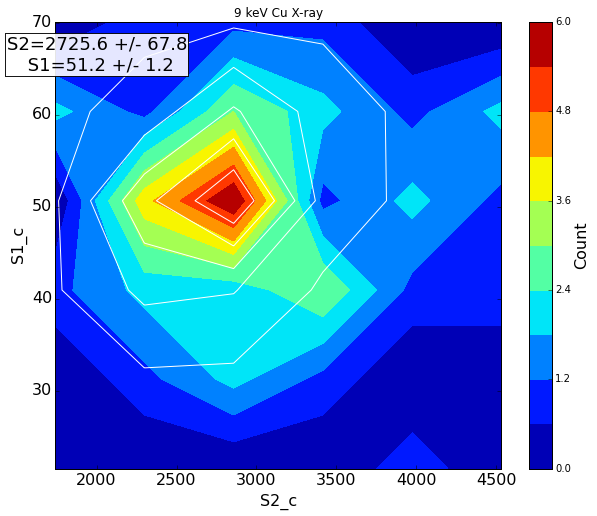

In [121]:
data_fitted = twoD_Gaussian((x, y), *popt)
figure
fig, ax = plt.subplots(1,1)
ax.hold(True)
#ax.imshow(H.reshape(x.shape), cmap=plt.cm.jet, origin='bottom',
#    extent=(x.min(), x.max(), y.min(), y.max()))
plt.contourf(x_bin_center,y_bin_center,H,10)
ax.contour(x, y, data_fitted.reshape(x.shape), 5, colors='w')
plt.xlabel('S2_c',fontsize=16)
plt.ylabel('S1_c',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
cb=plt.colorbar()
cb.set_label('Count',fontsize=16)
plt.text(x.min()*1.15,y.max()*.95,'S2={:1.1f} +/- {:1.1f} \n S1={:1.1f} +/- {:1.1f}'.format(popt[1],sqrt(pcov[1,1]),popt[2],sqrt(pcov[2,2])),
         horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='w', alpha=0.9),fontsize=18)
plt.title('9 keV Cu X-ray')
#savefig('Run03_Golden_Doke/5keV_fit.pdf')

<h1> Check the R vs Z distribuation of the 2.8 keV events </h1>

In [32]:
c4.Clear()

In [33]:
c4 = rootnotes.default_canvas(name='Cu_RZ')

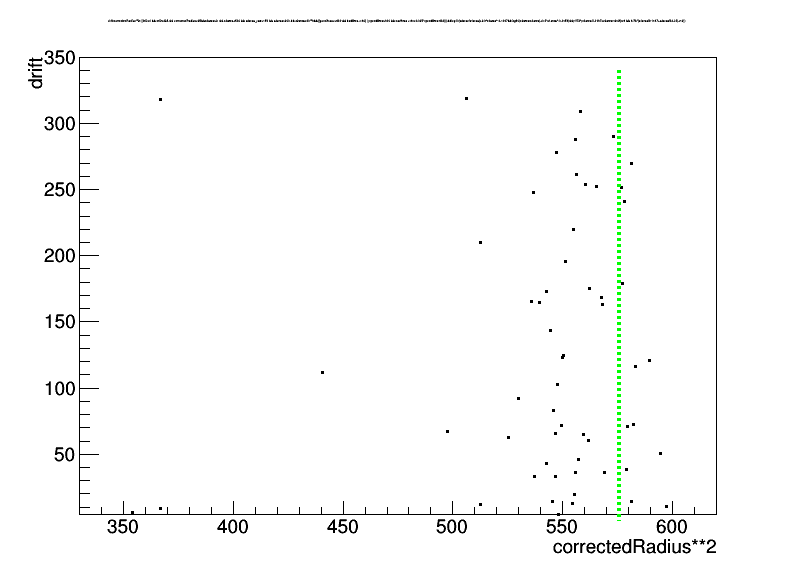

In [36]:
chain3.SetMarkerStyle(7)
chain3.SetMarkerSize(10)
#density_plt_hst=TH2F('density_plt_hst','5.2 keV x-ray 1;S2_{c};spikyS1_{c}',20,500,3500,20,1,50)
#density_plt_hst.Draw()
chain3.Draw('drift:correctedRadius**2',combined_cut+energy_cut) #s1area

linR18=TLine(18**2,35.5,18**2,305)
linR18.SetLineColor(2)
linR18.SetLineStyle(2)
linR18.SetLineWidth(4)
#linR18.Draw()

linR21=TLine(24**2,0,24**2,340)
linR21.SetLineColor(3)
linR21.SetLineStyle(2)
linR21.SetLineWidth(4)
linR21.Draw()
c4